We will take some Seattle weather data and analyze it. Data goes back to 1948

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

seattle_Weather_Data = pd.read_csv('seattleWeather_1948-2017.csv')
seattle_Weather_Data.head(20)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


In [10]:
seattle_Weather_DF = pd.DataFrame(seattle_Weather_Data)
seattle_Weather_DF.columns = ['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN']

seattle_Weather_DF.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [71]:
count = 0
for i, weather in zip(seattle_Weather_DF['DATE'], seattle_Weather_DF['RAIN']):
    if (weather):
        count += 1

ratio = count/len(seattle_Weather_DF['DATE']) *100
print('Since 1948, %f percent of the days in Seattle have had rain' %ratio)

Since 1948, 42.671520 percent of the days in Seattle have had rain


In [79]:
seattle_2016 = seattle_Weather_DF[seattle_Weather_DF['DATE'].str.contains('2016')]
seattle_2016 = seattle_2016.reset_index()
seattle_1948 = seattle_Weather_DF[seattle_Weather_DF['DATE'].str.contains('1948')]
seattle_1948 = seattle_1948.reset_index()

newDf = {'2016 Hi': seattle_2016['TMAX'], '1948 Hi': seattle_1948['TMAX']}

temp2016vs1948 = pd.DataFrame(newDf)
temp2016vs1948.head()

,1948 Hi,2016 Hi
0,51,46
1,45,42
2,45,40
3,45,38
4,45,46


(Text(0.5,1,'2016 vs 1948 Low Temps in Seattle'),
 Text(0.5,0,'Day out of Year'),
 Text(0,0.5,'Temp'))

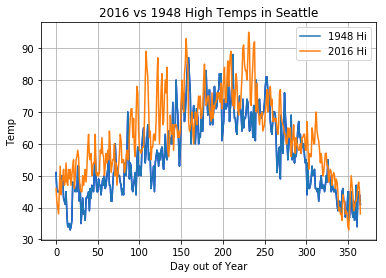

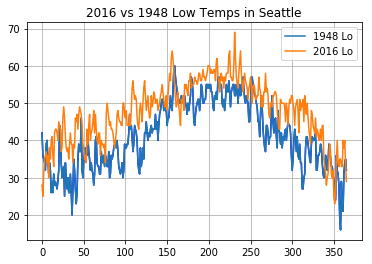

In [104]:
plt.figure()
ax = temp2016vs1948.plot.line(y = '1948 Hi', color = 'BLUE', legend = False, grid = True)
temp2016vs1948.plot.line(ax = ax, legend = True, grid = True)
ax.set_title('2016 vs 1948 High Temps in Seattle'), ax.set_xlabel('Day out of Year'), ax.set_ylabel('Temp')


newDf2 = newDf = {'2016 Lo': seattle_2016['TMIN'], '1948 Lo': seattle_1948['TMIN']}
temp2016vs1948_2 = pd.DataFrame(newDf2)
ax2 = temp2016vs1948_2.plot.line(y = '1948 Lo', color = 'BLUE', legend = False, grid = True)
temp2016vs1948_2.plot.line(ax = ax2, legend = True, grid = True)
ax2.set_title('2016 vs 1948 Low Temps in Seattle'), ax.set_xlabel('Day out of Year'), ax.set_ylabel('Temp')

In [97]:
seattle_Weather_DF.DATE = pd.to_datetime(seattle_Weather_DF.DATE)
seattle_Weather_DF['DATE'].dtype

dtype('<M8[ns]')

In [114]:
seattle_Weather_DF.head()

,DATE,PRCP,TMAX,TMIN,RAIN,year,month
0,1948-01-01,0.47,51,42,True,1948,1
1,1948-01-02,0.59,45,36,True,1948,1
2,1948-01-03,0.42,45,35,True,1948,1
3,1948-01-04,0.31,45,34,True,1948,1
4,1948-01-05,0.17,45,32,True,1948,1


In [126]:
seattle_Weather_DF['YEAR'] = pd.DatetimeIndex(seattle_Weather_DF['DATE']).year
seattle_Weather_DF['MONTH'] = pd.DatetimeIndex(seattle_Weather_DF['DATE']).month
seattle_Weather_DF['DAY'] = pd.DatetimeIndex(seattle_Weather_DF['DATE']).day

seattle_Weather_DF.head()

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,1948-01-01,0.47,51,42,True,1948,1,1
1,1948-01-02,0.59,45,36,True,1948,1,2
2,1948-01-03,0.42,45,35,True,1948,1,3
3,1948-01-04,0.31,45,34,True,1948,1,4
4,1948-01-05,0.17,45,32,True,1948,1,5


Text(0,0.5,'INCHES OF RAIN')

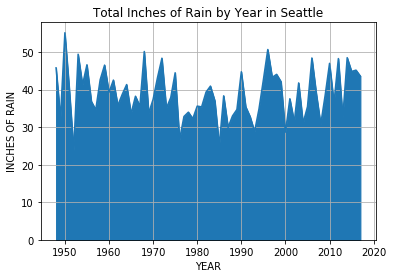

In [144]:
total_prcp_DF = seattle_Weather_DF.groupby('YEAR', as_index=False).agg({"PRCP": "sum"})

ax = total_prcp_DF.plot.area(x = 'YEAR', 
                             y = 'PRCP', 
                             grid = True, 
                             title = 'Total Inches of Rain by Year in Seattle',
                             legend = False)
ax.set_ylabel('INCHES OF RAIN')

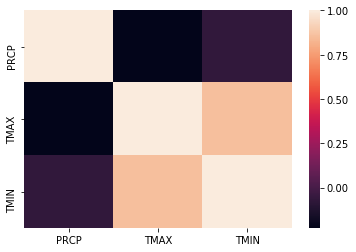

In [146]:
import seaborn as sns

seattle_Weather_Features = seattle_Weather_DF[['PRCP', 'TMAX', 'TMIN']]
corr = seattle_Weather_Features.corr()
sns.heatmap(corr)

In [174]:
HiTemps_DF = seattle_Weather_DF.groupby('YEAR', as_index=False).agg({"TMAX": "mean", "TMIN" : "mean"})
HiTemps_DF.head()
# LoTemps_DF = seattle_Weather_DF.groupby('YEAR', as_index=False).agg({"TMIN": "mean"})

,YEAR,TMAX,TMIN
0,1948,57.013661,41.196721
1,1949,59.147945,41.391781
2,1950,57.035616,41.000000
3,1951,58.545205,41.052055
4,1952,58.743169,41.467213


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'Temperature')

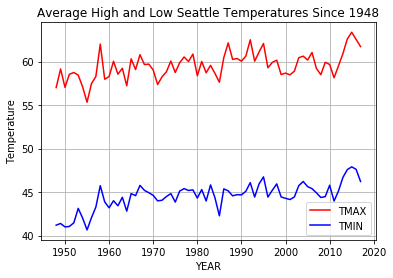

In [180]:
ax = HiTemps_DF.plot.line(x = 'YEAR', 
                          y = ['TMAX', 'TMIN'], 
                          grid = True, 
                          legend = True, 
                          title = 'Average High and Low Seattle Temperatures Since 1948', 
                          color = ['RED', 'BLUE'])

ax.set_ylabel('Temperature')